In [3]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from scipy.stats.mstats import zscore 
from scipy.stats import norm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25, style='whitegrid')

## Preprocess subject
run `beh_proc.py` to create concatenated, trial-labeled study & test files 

e.g. `python beh_proc.py 045 -i KH`

# Group values

### Load group data

In [4]:
sublist = pd.read_csv('sublist.csv')
sublist = sublist.replace(to_replace='eMMT',value='',regex=True)
all_subs = sublist['subid']
all_initials = sublist['initials']
print all_subs
print all_initials

0     007
1     008
2     009
3     012
4     015
5     020
6     025
7     030
8     035
9     040
10    045
11    050
12    016
13    055
14    059
Name: subid, dtype: object
0     MG
1     aw
2     kj
3     SP
4     LR
5     sw
6     ak
7     NR
8     al
9     ch
10    KH
11    MM
12    KC
13    BL
14    SP
Name: initials, dtype: object


### Calculate response rates

In [5]:
l = list()

os.chdir('/Volumes/group/awagner/annakhaz/emmt/data/beh/')

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))
    
    # totals
    n_targets = float(sum(test_df['mem'] == 'hi_hit') + 
                    sum(test_df['mem'] == 'lo_hit') + 
                    sum(test_df['mem'] == 'hi_miss') + 
                    sum(test_df['mem'] == 'lo_miss'))
                
    n_foils = float(sum(test_df['mem'] == 'hi_fa') +
                    sum(test_df['mem'] == 'lo_fa') +
                    sum(test_df['mem'] == 'hi_cr') +
                    sum(test_df['mem'] == 'lo_cr'))
    
    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df[test_df['mem'] == 'hi_hit'].count()['mem']/n_targets
    d['lo_hit_rate'] = test_df[test_df['mem'] == 'lo_hit'].count()['mem']/n_targets
    d['hi_miss_rate'] = test_df[test_df['mem'] == 'hi_miss'].count()['mem']/n_targets
    d['lo_miss_rate'] = test_df[test_df['mem'] == 'lo_miss'].count()['mem']/n_targets
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']/n_foils
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']/n_foils
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']/n_foils
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']/n_foils
    d['study_rt'] = np.mean(study_df['RT'])
    l.append(d)    


### Calculate d'

In [6]:
rate_df = pd.DataFrame(l)
rate_df = rate_df.reindex_axis(['sub'] + list(rate_df.columns[:-1]), axis=1)
rate_df['dprime'] = norm.ppf(rate_df['hi_hit_rate']) - norm.ppf(rate_df['hi_fa_rate'])
rate_df['lo_dprime'] = norm.ppf(rate_df['lo_hit_rate']) - norm.ppf(rate_df['lo_fa_rate'])


In [7]:
flat_rate_df = pd.melt(rate_df, id_vars=['sub'], value_vars=list(rate_df.columns.values)[0:-1].append('dprime'), var_name='cond', value_name='rate')

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


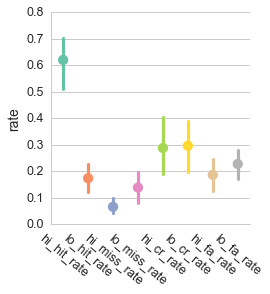

In [8]:
g = sns.factorplot(x='cond', y='rate', data=flat_rate_df, join=False, palette='Set2', kind='point',
                  x_order=['hi_hit_rate', 'lo_hit_rate', 'hi_miss_rate', 'lo_miss_rate', 'hi_cr_rate', 'lo_cr_rate', 'hi_fa_rate', 'lo_fa_rate'])
g.set_xticklabels(rotation=-40)
g.set_xlabels('')

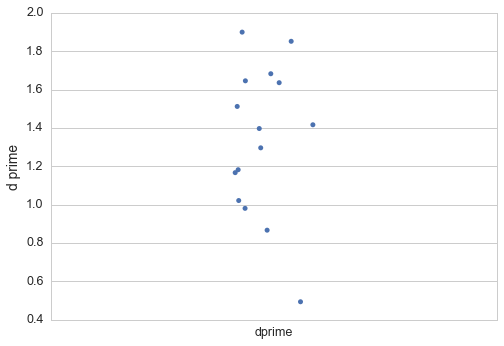

In [9]:
g = sns.stripplot(x='cond',y='rate',data=flat_rate_df.loc[flat_rate_df['cond'] == 'dprime'], jitter=True)
g.set_xlabel('')
#g.set_xticklabels(['pilot subjects'])
g.set_ylabel('d prime')


### Same for No Distractor trials

In [37]:
l = list()

os.chdir('/Volumes/group/awagner/annakhaz/emmt/data/beh/')

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))
    
    num_ND = sum(study_df.loc[study_df['testLater'] == 'Y']['distCond'] == 'ND')
    
    # totals
    n_targets = float(sum(test_df[test_df['mem'] == 'hi_hit']['distCond'] == 'ND') + 
                    sum(test_df[test_df['mem'] == 'lo_hit']['distCond'] == 'ND') + 
                    sum(test_df[test_df['mem'] == 'hi_miss']['distCond'] == 'ND') + 
                    sum(test_df[test_df['mem'] == 'lo_miss']['distCond'] == 'ND'))
                
    n_foils = float(sum(test_df['mem'] == 'hi_fa') +
                    sum(test_df['mem'] == 'lo_fa') +
                    sum(test_df['mem'] == 'hi_cr') +
                    sum(test_df['mem'] == 'lo_cr'))
    
    
    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'hi_hit'].count()['mem']/n_targets
    d['lo_hit_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'lo_hit'].count()['mem']/n_targets
    d['hi_miss_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'hi_miss'].count()['mem']/n_targets
    d['lo_miss_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'lo_miss'].count()['mem']/n_targets
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']/n_foils
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']/n_foils
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']/n_foils
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']/n_foils
    l.append(d)    

ND_rate_df = pd.DataFrame(l)
ND_rate_df = ND_rate_df.reindex_axis(['sub'] + list(ND_rate_df.columns[:-1]), axis=1)
ND_rate_df['dprime'] = norm.ppf(ND_rate_df['hi_hit_rate']) - norm.ppf(ND_rate_df['hi_fa_rate'])

flat_ND_rate_df = pd.melt(ND_rate_df, id_vars=['sub'], value_vars=list(ND_rate_df.columns.values)[0:-1].append('dprime'), var_name='cond', value_name='rate')

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


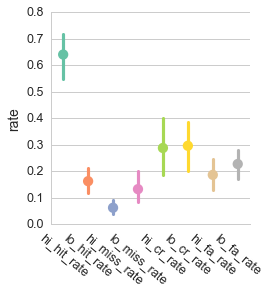

In [38]:
g = sns.factorplot(x='cond', y='rate', data=flat_ND_rate_df, join=False, palette='Set2', kind='point',
                  x_order=['hi_hit_rate', 'lo_hit_rate', 'hi_miss_rate', 'lo_miss_rate', 'hi_cr_rate', 'lo_cr_rate', 'hi_fa_rate', 'lo_fa_rate'])
g.set_xticklabels(rotation=-40)
g.set_xlabels('')

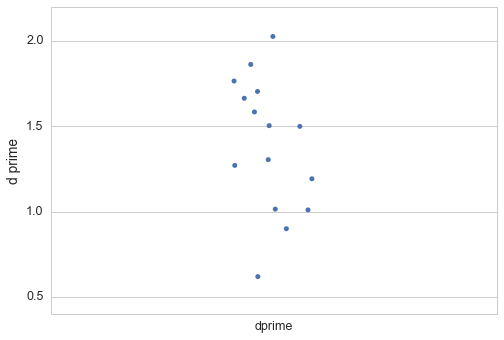

In [39]:
g = sns.stripplot(x='cond',y='rate',data=flat_ND_rate_df.loc[flat_ND_rate_df['cond'] == 'dprime'], jitter=True)
g.set_xlabel('')
#g.set_xticklabels(['pilot subjects'])
g.set_ylabel('d prime')

In [40]:
l = list()

os.chdir('/Volumes/group/awagner/annakhaz/emmt/data/beh/')

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))
    
    num_D = sum(study_df.loc[study_df['testLater'] == 'Y']['distCond'] == 'D')
    
    # totals
    n_targets = float(sum(test_df[test_df['mem'] == 'hi_hit']['distCond'] == 'D') + 
                    sum(test_df[test_df['mem'] == 'lo_hit']['distCond'] == 'D') + 
                    sum(test_df[test_df['mem'] == 'hi_miss']['distCond'] == 'D') + 
                    sum(test_df[test_df['mem'] == 'lo_miss']['distCond'] == 'D'))
                
    n_foils = float(sum(test_df['mem'] == 'hi_fa') +
                    sum(test_df['mem'] == 'lo_fa') +
                    sum(test_df['mem'] == 'hi_cr') +
                    sum(test_df['mem'] == 'lo_cr'))
    
    
    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'hi_hit'].count()['mem']/n_targets
    d['lo_hit_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'lo_hit'].count()['mem']/n_targets
    d['hi_miss_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'hi_miss'].count()['mem']/n_targets
    d['lo_miss_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'lo_miss'].count()['mem']/n_targets
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']/n_foils
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']/n_foils
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']/n_foils
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']/n_foils
    l.append(d)     

D_rate_df = pd.DataFrame(l)
D_rate_df = D_rate_df.reindex_axis(['sub'] + list(D_rate_df.columns[:-1]), axis=1)
D_rate_df['dprime'] = norm.ppf(D_rate_df['hi_hit_rate']) - norm.ppf(D_rate_df['hi_fa_rate'])
flat_D_rate_df = pd.melt(D_rate_df, id_vars=['sub'], value_vars=list(D_rate_df.columns.values)[0:-1].append('dprime'), var_name='cond', value_name='rate')

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [41]:
D_rate_df

,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate,dprime
0,7.0,0.106509,0.284024,0.760417,0.010417,0.337278,0.272189,0.177083,0.052083,1.278573
1,8.0,0.733728,0.266272,0.885417,0.114583,0.000000,0.000000,0.000000,0.000000,1.826635
2,9.0,0.221053,0.378947,0.768293,0.012195,0.000000,0.400000,0.219512,0.000000,1.041482
3,12.0,0.211765,0.158824,0.468750,0.041667,0.323529,0.305882,0.343750,0.145833,0.920892
4,15.0,0.125000,0.345238,0.776596,0.010638,0.184524,0.345238,0.127660,0.085106,1.158955
5,20.0,0.798817,0.082840,0.585106,0.265957,0.029586,0.088757,0.085106,0.063830,1.601192
6,25.0,0.384615,0.177515,0.760417,0.072917,0.295858,0.142012,0.072917,0.093750,1.632521
7,30.0,0.390533,0.112426,0.552083,0.135417,0.230769,0.266272,0.197917,0.114583,1.344653
8,35.0,0.335294,0.217647,0.673684,0.126316,0.270588,0.176471,0.052632,0.147368,1.230274
9,40.0,0.240964,0.391566,0.697917,0.062500,0.234940,0.132530,0.072917,0.166667,0.793657


In [42]:
np.mean(D_rate_df['dprime'])

1.1937105710372058

In [43]:
ND_rate_df

,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate,dprime
0,7.0,0.106509,0.284024,0.768240,0.021459,0.337278,0.272189,0.154506,0.055794,1.303994
1,8.0,0.733728,0.266272,0.892241,0.107759,0.000000,0.000000,0.000000,0.000000,1.862663
2,9.0,0.221053,0.378947,0.759804,0.073529,0.000000,0.400000,0.166667,0.000000,1.013919
3,12.0,0.211765,0.158824,0.606838,0.034188,0.323529,0.305882,0.239316,0.119658,1.270391
4,15.0,0.125000,0.345238,0.786325,0.017094,0.184524,0.345238,0.136752,0.059829,1.191943
5,20.0,0.798817,0.082840,0.609442,0.240343,0.029586,0.088757,0.090129,0.060086,1.664083
6,25.0,0.384615,0.177515,0.782051,0.064103,0.295858,0.142012,0.102564,0.051282,1.704017
7,30.0,0.390533,0.112426,0.709402,0.094017,0.230769,0.266272,0.106838,0.089744,1.765365
8,35.0,0.335294,0.217647,0.763948,0.060086,0.270588,0.176471,0.098712,0.077253,1.499226
9,40.0,0.240964,0.391566,0.733624,0.096070,0.234940,0.132530,0.056769,0.113537,0.899051


In [44]:
np.mean(ND_rate_df['dprime'])

1.394415008695473

In [45]:
rate_df

,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate,study_rt
0,7.0,18,48,252,6,57,46,53,18,0.843344
1,8.0,124,45,292,36,0,0,0,0,0.964657
2,9.0,21,36,218,16,0,38,52,0,0.988581
3,12.0,36,27,187,12,55,52,89,42,1.030151
4,15.0,21,58,257,5,31,58,44,22,0.000000
5,20.0,135,14,197,81,5,15,29,20,1.387777
6,25.0,65,30,256,22,50,24,31,21,0.943247
7,30.0,66,19,219,35,39,45,44,32,0.826658
8,35.0,57,37,242,26,46,30,28,32,1.175717
9,40.0,40,65,235,28,39,22,20,42,1.180253


In [46]:
# plot low conf and high conf dprimes

In [53]:
dprimes = pd.concat([D_rate_df['dprime'],ND_rate_df.rename(columns={'dprime':'ND_dprime'})['ND_dprime']],axis=1)
dprimes

,dprime,ND_dprime
0,1.278573,1.303994
1,1.826635,1.862663
2,1.041482,1.013919
3,0.920892,1.270391
4,1.158955,1.191943
5,1.601192,1.664083
6,1.632521,1.704017
7,1.344653,1.765365
8,1.230274,1.499226
9,0.793657,0.899051


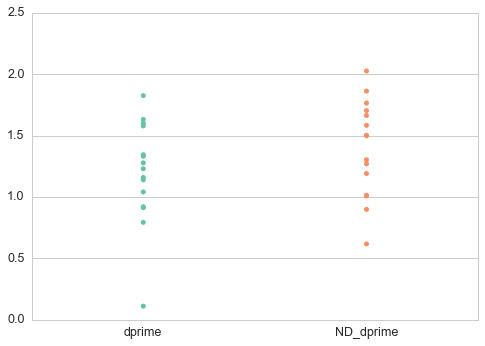

In [58]:
g = sns.stripplot(data=dprimes, palette='Set2')


## Investigating human/nonhuman responses

Do participants tend to respond with one vs. the other?

In [22]:
for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    print 'subj ' + s
    print '    human ' + str(sum(study_df['resp'] == 'j'))
    print '    nonhuman ' + str(sum(study_df['resp'] == 'k'))

subj 007
    human 118
    nonhuman 205
subj 008
    human 155
    nonhuman 175
subj 009
    human 163
    nonhuman 167
subj 012
    human 115
    nonhuman 215
subj 015
    human 0
    nonhuman 0
subj 020
    human 160
    nonhuman 169
subj 025
    human 118
    nonhuman 212
subj 030
    human 200
    nonhuman 128
subj 035
    human 115
    nonhuman 215
subj 040
    human 294
    nonhuman 34
subj 045
    human 170
    nonhuman 128
subj 050
    human 142
    nonhuman 187
subj 016
    human 118
    nonhuman 167
subj 055
    human 133
    nonhuman 196
subj 059
    human 197
    nonhuman 133


How often do they switch from one to the other?

In [23]:
for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    print 'subj ' + s
    n_switches = 0
    for trial in range(len(study_df['resp']) - 1):
            if study_df['resp'][trial] == 'k' and study_df['resp'][trial + 1] == 'j' or study_df['resp'][trial] == 'j' and study_df['resp'][trial + 1] == 'k':
                n_switches += 1
            
    print '    switches ' + str(n_switches)


subj 007
    switches 149
subj 008
    switches 139
subj 009
    switches 137
subj 012
    switches 155
subj 015
    switches 0
subj 020
    switches 146
subj 025
    switches 152
subj 030
    switches 147
subj 035
    switches 135
subj 040
    switches 50
subj 045
    switches 114
subj 050
    switches 154
subj 016
    switches 119
subj 055
    switches 162
subj 059
    switches 174


What is the average length of a response train?

In [24]:
for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    print 'subj ' + s
    train_lengths = []
    curr_train = 1
    for trial in range(len(study_df['resp']) - 1):
        if study_df['resp'][trial] == 'k' and study_df['resp'][trial + 1] == 'j' or study_df['resp'][trial] == 'j' and study_df['resp'][trial + 1] == 'k':
            train_lengths.append(curr_train)
            curr_train = 1
        else:
            curr_train += 1
    print '    num response trains ' + str(len(train_lengths))        
    print '    avg train length ' + str(np.mean(train_lengths))


subj 007
    num response trains 149
    avg train length 2.18791946309
subj 008
    num response trains 139
    avg train length 2.36690647482
subj 009
    num response trains 137
    avg train length 2.40145985401
subj 012
    num response trains 155
    avg train length 2.12258064516
subj 015
    num response trains 0
    avg train length nan
subj 020
    num response trains 146
    avg train length 2.25342465753
subj 025
    num response trains 152
    avg train length 2.15789473684
subj 030
    num response trains 147
    avg train length 2.21088435374
subj 035
    num response trains 135
    avg train length 2.42222222222
subj 040
    num response trains 50
    avg train length 2.2
subj 045
    num response trains 114
    avg train length 2.88596491228
subj 050
    num response trains 154
    avg train length 2.13636363636
subj 016
    num response trains 119
    avg train length 2.73949579832
subj 055
    num response trains 162
    avg train length 2.02469135802
subj 059
    nu

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


## Counts

In [25]:
l = list()

os.chdir('../beh/')

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))

    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df[test_df['mem'] == 'hi_hit'].count()['mem']
    d['lo_hit_rate'] = test_df[test_df['mem'] == 'lo_hit'].count()['mem']
    d['hi_miss_rate'] = test_df[test_df['mem'] == 'hi_miss'].count()['mem']
    d['lo_miss_rate'] = test_df[test_df['mem'] == 'lo_miss'].count()['mem']
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']
    d['study_rt'] = np.mean(study_df['RT'])
    l.append(d)    


In [26]:
rate_df = pd.DataFrame(l)
rate_df = rate_df.reindex_axis(['sub'] + list(rate_df.columns[:-1]), axis=1)

In [27]:
rate_df

,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate,study_rt
0,7.0,18,48,252,6,57,46,53,18,0.843344
1,8.0,124,45,292,36,0,0,0,0,0.964657
2,9.0,21,36,218,16,0,38,52,0,0.988581
3,12.0,36,27,187,12,55,52,89,42,1.030151
4,15.0,21,58,257,5,31,58,44,22,0.000000
5,20.0,135,14,197,81,5,15,29,20,1.387777
6,25.0,65,30,256,22,50,24,31,21,0.943247
7,30.0,66,19,219,35,39,45,44,32,0.826658
8,35.0,57,37,242,26,46,30,28,32,1.175717
9,40.0,40,65,235,28,39,22,20,42,1.180253


In [28]:
l = list()

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))

    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'hi_hit'].count()['mem']
    d['lo_hit_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'lo_hit'].count()['mem']
    d['hi_miss_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'hi_miss'].count()['mem']
    d['lo_miss_rate'] = test_df.loc[test_df['distCond'] == 'ND'][test_df['mem'] == 'lo_miss'].count()['mem']
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']
    l.append(d)    

ND_rate_df = pd.DataFrame(l)
ND_rate_df = ND_rate_df.reindex_axis(['sub'] + list(ND_rate_df.columns[:-1]), axis=1)
ND_rate_df

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate
0,7.0,18,48,179,5,57,46,36,13
1,8.0,124,45,207,25,0,0,0,0
2,9.0,21,36,155,15,0,38,34,0
3,12.0,36,27,142,8,55,52,56,28
4,15.0,21,58,184,4,31,58,32,14
5,20.0,135,14,142,56,5,15,21,14
6,25.0,65,30,183,15,50,24,24,12
7,30.0,66,19,166,22,39,45,25,21
8,35.0,57,37,178,14,46,30,23,18
9,40.0,40,65,168,22,39,22,13,26


In [29]:
l = list()

for s in all_subs:
    study_df = pd.read_csv('s{0}/eMMT{0}_study_concat_mem.csv'.format(s))
    test_df = pd.read_csv('s{0}/eMMT{0}_test_concat_mem.csv'.format(s))

    # get response rates
    d = {}
    d['sub'] = test_df['subjNum'][0]
    d['hi_hit_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'hi_hit'].count()['mem']
    d['lo_hit_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'lo_hit'].count()['mem']
    d['hi_miss_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'hi_miss'].count()['mem']
    d['lo_miss_rate'] = test_df.loc[test_df['distCond'] == 'D'][test_df['mem'] == 'lo_miss'].count()['mem']
    d['hi_fa_rate'] = test_df[test_df['mem'] == 'hi_fa'].count()['mem']
    d['lo_fa_rate'] = test_df[test_df['mem'] == 'lo_fa'].count()['mem']
    d['hi_cr_rate'] = test_df[test_df['mem'] == 'hi_cr'].count()['mem']
    d['lo_cr_rate'] = test_df[test_df['mem'] == 'lo_cr'].count()['mem']
    l.append(d)    

D_rate_df = pd.DataFrame(l)
D_rate_df = D_rate_df.reindex_axis(['sub'] + list(D_rate_df.columns[:-1]), axis=1)
D_rate_df

/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/annakhazenzon/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,sub,hi_cr_rate,hi_fa_rate,hi_hit_rate,hi_miss_rate,lo_cr_rate,lo_fa_rate,lo_hit_rate,lo_miss_rate
0,7.0,18,48,73,1,57,46,17,5
1,8.0,124,45,85,11,0,0,0,0
2,9.0,21,36,63,1,0,38,18,0
3,12.0,36,27,45,4,55,52,33,14
4,15.0,21,58,73,1,31,58,12,8
5,20.0,135,14,55,25,5,15,8,6
6,25.0,65,30,73,7,50,24,7,9
7,30.0,66,19,53,13,39,45,19,11
8,35.0,57,37,64,12,46,30,5,14
9,40.0,40,65,67,6,39,22,7,16


### Memory behavior is not correlated with length of study-test delay
Though, numerically, it is negatively correlated (as expected)

In [30]:
os.chdir('/Volumes/group/awagner/annakhaz/emmt/analysis/')
group_beh = pd.read_csv('emmt_group_beh.csv')

In [31]:
pearsonr(group_beh['hi_ND_dprime'],group_beh['delay'])

(-0.31214542427765307, 0.27726229076287306)

In [32]:
np.mean(group_beh['delay'])

14.857142857142858